In [1]:
options(warn=-1)

In [2]:
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")

library("dplyr")
library("stringr")

Loading required package: NLP

Loading required package: RColorBrewer



In [3]:
text <- readLines('data/wp/obriv.txt', encoding = 'utf-8')

In [4]:
# text[10:20]

In [5]:
text_clear_null_string <- str_subset(text, ".+")

In [6]:
# text_clear_null_string[10:20]

In [7]:
text -> text_clear_null_string

In [8]:
docs <- Corpus(VectorSource(text))

In [9]:
# inspect(docs)

In [10]:
# Convert the text to lower case
docs <- tm_map(docs, content_transformer(tolower))
# Remove numbers
docs <- tm_map(docs, removeNumbers)
# Remove english common stopwords
docs <- tm_map(docs, removeWords, stopwords("russian"))
# Remove your own stop word
# specify your stopwords as a character vector
stopruswords <- c("— 	","—	","…	","марковна","марфинька","тебе","райский","бабушка","фр","вера","татьяна","не","на","только","с","к","я","о","а","ему","от","у","она","но","так","все","было","что","и","в","его","как","из","еще","за","это","бы","вы","то","он","же","по","ее","это", "в", "с", "и", "который", "свой", "весь", "хотя", "вообще", "ох", "всё", "ты","который","которые","ежели", "очень", "бы", "что-то", "—", "…","— "," —")
docs <- tm_map(docs, removeWords, stopruswords) 
# Remove punctuations
docs <- tm_map(docs, removePunctuation)
# Eliminate extra white spaces
docs <- tm_map(docs, stripWhitespace)

In [11]:
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d, 20)

,word,freq
,<chr>,<dbl>
—,—,3986
—,—,2807
—,—,1689
…,…,977
глаза,глаза,268
руку,руку,234
спросил,спросил,224
говорила,говорила,212
жизни,жизни,203


In [23]:
slice_sample(d, n=10) # замена sample_n(d, 10)
# slice_sample(df, n = 10, replace = TRUE)

,word,freq
,<chr>,<dbl>
коне,коне,3
прорвалось,прорвалось,1
дом,дом,92
тягость,тягость,1
возится,возится,7
колоритом,колоритом,3
устремленные,устремленные,1
женщинах,женщинах,2
деловое,деловое,1


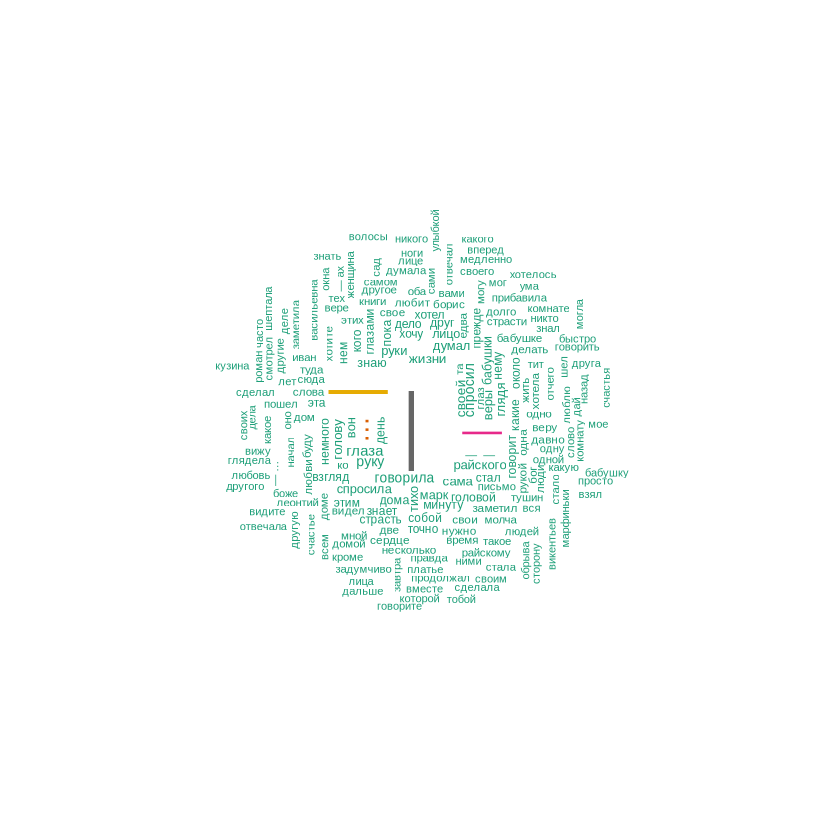

In [14]:
set.seed(1234)
wordcloud(words = d$word, freq = d$freq, min.freq = 5,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

In [15]:
str(d)

'data.frame':	37607 obs. of  2 variables:
 $ word: chr  "— " "—" " —" "…" ...
 $ freq: num  3986 2807 1689 977 268 ...


In [20]:
sample_n(d, 30)

,word,freq
,<chr>,<dbl>
кружевными,кружевными,1
дальнейших,дальнейших,1
регул,регул,1
сагах,сагах,1
рвется,рвется,2
седьмой,седьмой,2
диету,диету,1
грустны,грустны,1
дном,дном,3
